In [2]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

WHen you want to try dealing with string and categorical values check this post https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables  

In [3]:
flight_df=pd.read_csv('all_flights.csv')
flight_df.head()
flight_df.dtypes

FL_DATE                 object
OP_UNIQUE_CARRIER       object
TAIL_NUM                object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
Unnamed: 16            float64
dtype: object

What's the range of distances so we can assign a suitable short haul, medium and long haul 

In [4]:
flight_df['DISTANCE'].min()

31.0

In [5]:
flight_df['DISTANCE'].max()


4983.0

Lets' suppose distances were divided into SHORT, MEDIUM, LONG  then I could treat each as ordinal 0,1,2 because they truly have mroe chance of being delayed as they get longer from short to long.  i.e. the larger number fits the value

In [6]:
def shortMedLong(distance):
    if float(distance) < 500:
        return 0
    elif float(distance) <1500:
        return 1
    else:
        return 2
    
flight_df = pd.read_csv('all_flights.csv',converters={'DISTANCE':shortMedLong})
flight_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 16
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225.0,210.0,197.0,2,NaN
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225.0,202.0,191.0,2,NaN
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105.0,90.0,80.0,1,NaN
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105.0,96.0,81.0,1,NaN
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100.0,92.0,80.0,1,NaN


In [ ]:
What is the average delay by distance

In [7]:
flight_df.groupby('DISTANCE')['ARR_DELAY'].mean()

DISTANCE
0    2.993694
1    3.182599
2    0.860623
Name: ARR_DELAY, dtype: float64

Text(0, 0.5, 'Average Flight Delay')

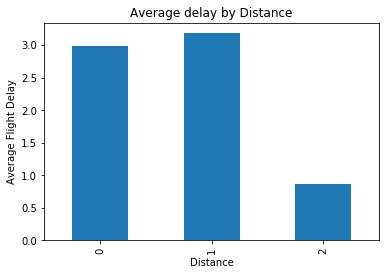

In [8]:
ax=flight_df.groupby('DISTANCE')['ARR_DELAY'].mean().plot(kind='bar',title='Average delay by Distance')
ax.set_xlabel('Distance')
ax.set_ylabel('Average Flight Delay')

Create DataFrame Containing only features and labels

In [55]:
min_flight_data_df = flight_df[['DISTANCE','ARR_DELAY']]
min_flight_data_df.shape

(616101, 2)

REmove any rows with Null values

In [56]:
no_missing_values_df = min_flight_data_df.dropna(axis=0,how='any')
no_missing_values_df.shape

(610334, 2)

In [57]:
no_missing_values_df.groupby('DISTANCE')['ARR_DELAY'].count()

DISTANCE
0    239597
1    296119
2     74618
Name: ARR_DELAY, dtype: int64

Split training and test data


In [59]:
# Create a dataFrame containign the features
X = no_missing_values_df['DISTANCE'].values.reshape(-1,1)


In [60]:
# Create a DataFrame containing the labels
# Reshape to -1,1 if only containing a single column
y = no_missing_values_df['ARR_DELAY'].values.reshape(-1,1)


In [61]:
#SPlit into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)
X_train.shape

(427233, 1)

In [62]:
X_test.shape

(183101, 1)

Train Using Scikit learn library


In [63]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients for our attributes

In [66]:
print(regressor.coef_)


[[-0.81818106]]


In [ ]:
there are all very small numbers so it does not appear there is a correlation between airline and number of minutes late for the flight
I suspect I would have better results if I just tried to predict LATE or ON TIME which would be classification not regression

Make a prediction

In [71]:
y_pred = regressor.predict(X_test)
#combine the two 1D numpy arrays into a 2D array
combined = np.hstack((y_test,y_pred))
#Convert to a DataFrame
accuracy_df = pd.DataFrame(combined,columns=['Actual','Predicted'])
accuracy_df.head

<bound method NDFrame.head of         Actual  Predicted
0        -13.0   2.606513
1        -24.0   3.424694
2        100.0   2.606513
3         -8.0   2.606513
4        -19.0   1.788332
...        ...        ...
183096    48.0   3.424694
183097   -24.0   3.424694
183098    20.0   2.606513
183099    47.0   2.606513
183100   -11.0   3.424694

[183101 rows x 2 columns]>

Lets check our accuracy


In [68]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  20.254098239560314


In [69]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 1774.1373575653884


In [70]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 42.1205099395222


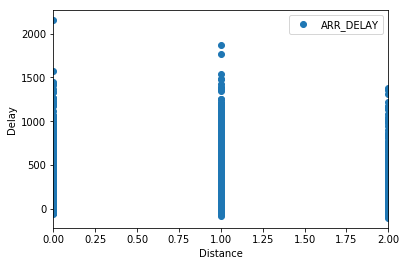

In [72]:
min_flight_data_df.plot(x='DISTANCE',y='ARR_DELAY',style='o')
plt.title='Flight distance vs Arrival delay'
plt.xlabel('Distance')
plt.ylabel('Delay')
plt.show()

you can see that there are flight delays of all duration at each distance so of course I have lousy results from my model , there is no strong correlation, again I wonder if perhaps a better to just predit late or on time which would be classification not regression.